# Project 4 => Global Power Plant Database

# Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Key attributes of the database
The database includes the following indicators:
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
•	`country_long` (text): longer form of the country designation
•	`name` (text): name or title of the power plant, generally in Romanized form
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
•	`capacity_mw` (number): electrical generating capacity in megawatts
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`primary_fuel` (text): energy source used in primary electricity generation or export
•	`other_fuel1` (text): energy source used in electricity generation or export
•	`other_fuel2` (text): energy source used in electricity generation or export
•	`other_fuel3` (text): energy source used in electricity generation or export
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
•	`url` (text): web document corresponding to the `source` field
•	`geolocation_source` (text): attribution for geolocation information
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
•	`year_of_capacity_data` (number): year the capacity information was reported
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
•	`generation_data_source` (text): attribution for the reported generation information
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Hint : Use pandas methods to combine all the datasets and then start working on this project.


Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/tree/main/Global%20Power%20Plant%20Database

# Prediction : 
## 1) Primary Fuel   

## 2) capacity_mw 

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import scipy as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Getting the Dataset

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [4]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset has 908 rows and 25 columns

We can see that the dataset is comprised of 25 columns including two target variables capacity_mw and primary_fuel(Fuel_Type) where we need to predict both capacity_mw and Fuel Type.

In [12]:
# Let's define primary_fuel as Fuel_Type to understand the dataset in better way
df.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

# Exploratory Data Analysis

In [16]:
#getting the shape of the dataset.
df.shape

(908, 25)

As mentioned above we have 908 rows and 25 columns

In [17]:
#gtting an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   Fuel_Type                 908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

We can clearly see that we have null values and also object datatype, which we will handle seperately bu imputer and encoding techniques

In [18]:
#checking of the data types of the dataset
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
Fuel_Type                    object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

The features that needs encoding are country, country_long, name, gppd_idnr,Fuel_Type,other_fuel1,other_fuel2, owner, source, url, geolocation_source,generation_data_source as they are object data type and the ML model needs numeric datatype.

In [19]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
Fuel_Type                     0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

It can be clearly seen that we have high number of null values and will treat accordigly.

In [20]:
# Checking number of unique values in each column
df.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
Fuel_Type                     8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Here the columns country, country_long, other_fuel2, year_of_capacity_data and generation_data_source have only one unique value. Also other_fuel3, wepp_id, estimated_generation_gwh have no unique values which means they are filled with only NAN values. Since these columns have same entries thoughout the dataset so we can drop these columns.

So let's do some feature engineering here.

# Feature Selection

In [22]:
# Checking the count of the country
df["country"].value_counts()

IND    908
Name: country, dtype: int64

In [23]:
# Checking the count of the country_long
df["country_long"].value_counts()

India    908
Name: country_long, dtype: int64

We see that only IND is listed in the country hence there is no impact of these two features on prediction

In [24]:
df.drop(columns=["country","country_long"],axis=1,inplace=True)

In [25]:
# Dropping irrelevant columns
df.drop(columns=["other_fuel2", "year_of_capacity_data","generation_data_source","other_fuel3","wepp_id","estimated_generation_gwh"], axis=1, inplace=True)

In [30]:
# Checking the count of name
df["name"].value_counts()

THANE PLANT                     1
BASSI                           1
Patan Taluka Wind Farm          1
KONASEEMA CCCP                  1
Udumalpet Wind Farm             1
                               ..
Surajbari Creek Wind Farm       1
Kathauti 2 Solar Power Plant    1
YELHANKA (DG)                   1
ONGC Jerat Wind Farm            1
OBRA-A                          1
Name: name, Length: 908, dtype: int64

In [31]:
df["gppd_idnr"].value_counts()

IND0000082    1
IND0000418    1
WRI1026140    1
WRI1019882    1
IND0000010    1
             ..
IND0000137    1
IND0000371    1
IND0000193    1
IND0000199    1
WRI1020244    1
Name: gppd_idnr, Length: 908, dtype: int64

We can see that each power plant has unique name and hence we can drop these features

In [32]:
#Dropping the columns that has no impact on the prediction
df.drop("name",axis=1,inplace=True) 
df.drop("gppd_idnr",axis=1,inplace=True)
df.drop("owner",axis=1,inplace=True)
df.drop("url",axis=1,inplace=True)

In [36]:
df.shape

(908, 13)

Now we see 908 rows 13 columns

In [33]:
# Checking null values again after feature selection
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
Fuel_Type                0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

<AxesSubplot:>

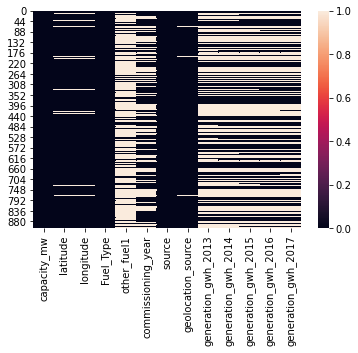

In [37]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

We can clearly observe the white lines in the heat map which indicates the missing values in the dataset.

In [46]:
#Checking the skewness of the dataset
df.skew().sort_values()

commissioning_year    -1.650230
latitude              -0.147391
longitude              1.150963
capacity_mw            3.193257
generation_gwh_2016    5.278233
generation_gwh_2017    5.312975
generation_gwh_2014    5.325540
generation_gwh_2013    5.535740
generation_gwh_2015    5.565770
dtype: float64

# Treating null values using imputation techniques.

##### Checking the mean and mode values of the features having null values, so that we can fill the null values

In [41]:
#checking the mean of latitude
df['latitude'].mean()

21.196188863109057

In [42]:
#checking the mode of other_fuel1 
df["other_fuel1"].mode()

0    Oil
dtype: object

In [43]:
#checking the mode of geolocation_source columns
df["geolocation_source"].mode()

0    WRI
dtype: object

##### Filling the null values

In [44]:
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2013"] = df["generation_gwh_2013"].fillna(df["generation_gwh_2013"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())

In [45]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
Fuel_Type              0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

We have treated the null values now and the data now shows no null values

<AxesSubplot:>

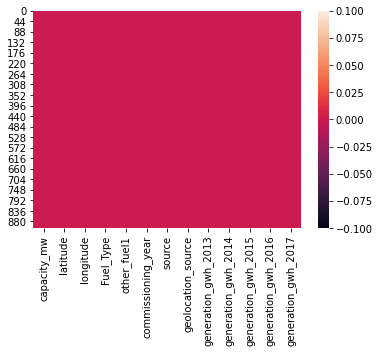

In [47]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

Clearly there is no null values

In [48]:
#Getting the columns in the dataset
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [49]:
# Checking the list of counts of capacity_mw
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
26.4       1
68.8       1
91.8       1
1.8        1
816.4      1
Name: capacity_mw, Length: 365, dtype: int64

In [50]:
# Checking the list of counts of primary_fuel
df['Fuel_Type'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: Fuel_Type, dtype: int64

In [51]:
# Checking the uniqueness of primary_fuel
df["Fuel_Type"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

# Feature Extraction

In [52]:
# Checking the list of counts of commissioning_year
df['commissioning_year'].value_counts()

2000.0    396
2013.0     28
2015.0     26
2012.0     23
2016.0     21
         ... 
1958.0      1
1949.0      1
1954.0      1
1956.0      1
1927.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [53]:
# Let's extract power plant age from commissioning year by subtracting it from the year 2018
df["Power_plant_age"] = 2018 - df["commissioning_year"]
df.drop(columns=["commissioning_year"], inplace = True)

Here I have extracted Power plant age from commissioning year and dropped commissioning year columns. From Power plant age we can get to know how old are the power plants.

In [54]:
df.head()

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,797.063475,805.760000,701.02725,716.728350,807.601700,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,797.063475,805.760000,701.02725,716.728350,807.601700,18.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,797.063475,805.760000,701.02725,716.728350,807.601700,18.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,631.777928,617.789264,843.74700,886.004428,663.774500,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,3.0


# Statistical Description of the DataSet

In [55]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.410936,1434.383254,1518.830440,1502.838018,1552.807503,1648.790766,19.816079
std,580.221767,6.088110,4.783873,2575.982982,2783.474774,2985.277178,3006.880849,3047.577626,13.085938
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,797.063475,805.760000,701.027250,716.728350,807.601700,15.000000
50%,60.000000,21.278850,76.719250,797.063475,805.760000,701.027250,716.728350,807.601700,18.000000
75%,388.125000,25.183775,79.211600,797.063475,805.760000,701.027250,716.728350,807.601700,21.000000
max,4760.000000,34.649000,95.408000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,91.000000


Here we can see the statistical analysis of the dataset (numerical only)

We can observe that the count of the columns are same, which means the dataset is balanced. The minimum capacity of the power plant is zero and maximum in 4760 and there is huge difference in mean and standard deviation.From the difference between maximum and 75% percentile we can infer that there are huge outliers present in most of the columns, will remove them using appropriate methods before building our model.

In [58]:
#checking the categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']


In [59]:
#checking the numeric columns for visualization
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)        

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']


# Data Visualization

## Univariate Analysis

### Categorical column visualization

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: Fuel_Type, dtype: int64


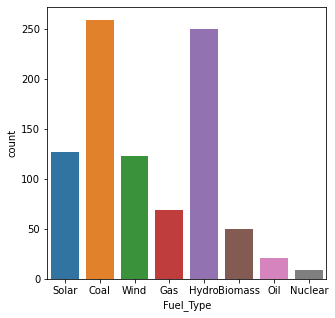

In [61]:
print(df['Fuel_Type'].value_counts())   #visualizing the fuel types in Fuel_Type
plt.figure(figsize=(5,5))
sns.countplot(df['Fuel_Type'])
plt.show()

Here we can see that the 'Coal' energy source is used  the highest in the generation of electricity. Then the next energy source used is the 'HydroBiomass' and followed by the other energy sources.

Oil             905
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


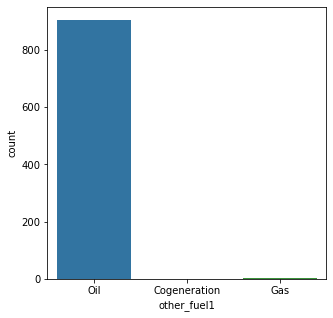

In [63]:
#checking the count of fuel1
print(df['other_fuel1'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df['other_fuel1'])
plt.show()

It can be observed that 'other_fuel1' type has 3 unique types namely: 'Oil', 'Cogeneration other fuel', 'Gas'. And it is clearly seen that oil is the max used fuel type.

WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


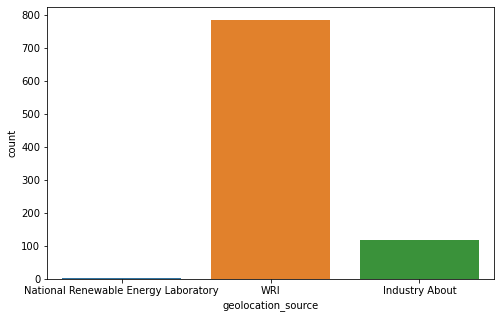

In [65]:
# Visualizing the counts of owner
print(df["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
plt.figure(figsize=(8,5))
sns.countplot(df['geolocation_source'])
plt.show()

Here it can be seen that the count of WRI is the max, which means that the max information is shared by this source.

5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
26.4       1
68.8       1
91.8       1
1.8        1
816.4      1
Name: capacity_mw, Length: 365, dtype: int64


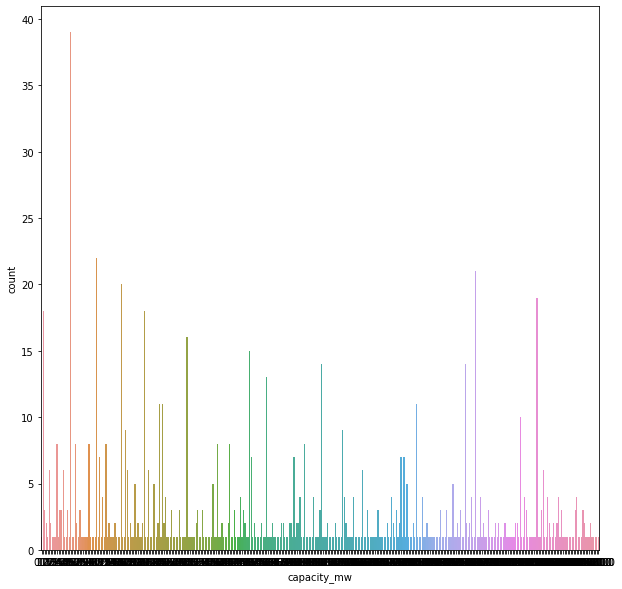

In [75]:
print(df['capacity_mw'].value_counts())   #visualizing the capacity_mw
plt.figure(figsize=(10,10))
sns.countplot(df['capacity_mw'])
plt.show()

# Checking the Distribution of the Dataset, if it is normal

#### Numerical Column

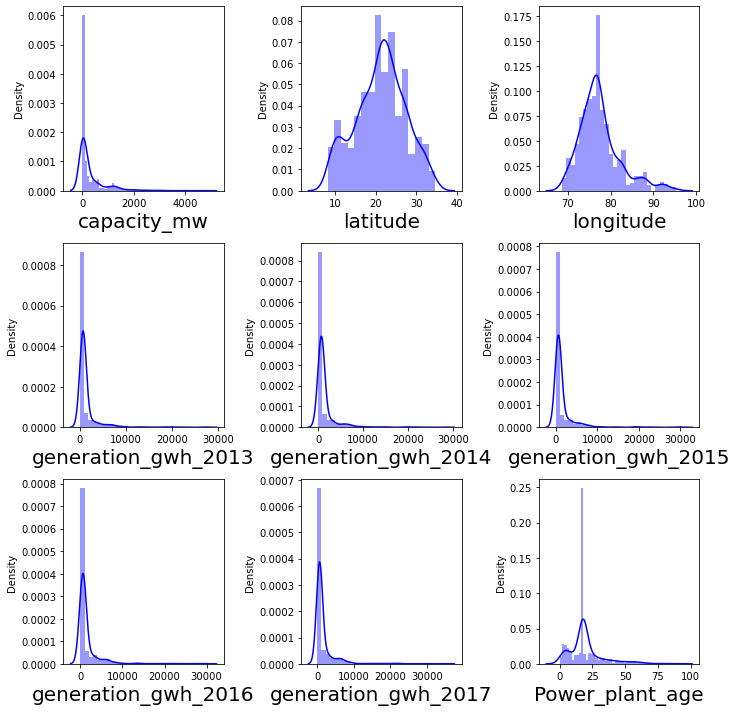

In [73]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="b")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Here in the plots we can see that the data is not normally distributed. Outliers and skewness is present, which needs to be treated,

## Bivariate Analysis

### Corealtion between features and targer 'Capacity_mw'

<AxesSubplot:title={'center':'Comparision between geolocation_source and capacity_mw'}, xlabel='geolocation_source', ylabel='capacity_mw'>

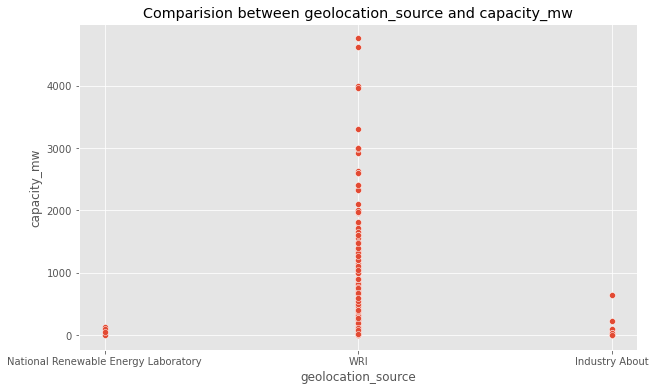

In [82]:
#Checking the relation between target capacity_mw and variable geolocation source
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between geolocation_source and capacity_mw')
sns.scatterplot(df['geolocation_source'],df["capacity_mw"])

Here also we can see that WRI plats a major role

<AxesSubplot:title={'center':'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

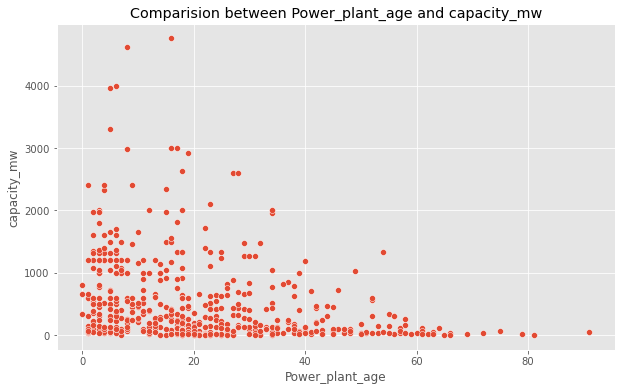

In [83]:
#Checking the relation between power plant age and capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.scatterplot(df['Power_plant_age'],df["capacity_mw"])

Here we can see a negative corelation

<AxesSubplot:title={'center':'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

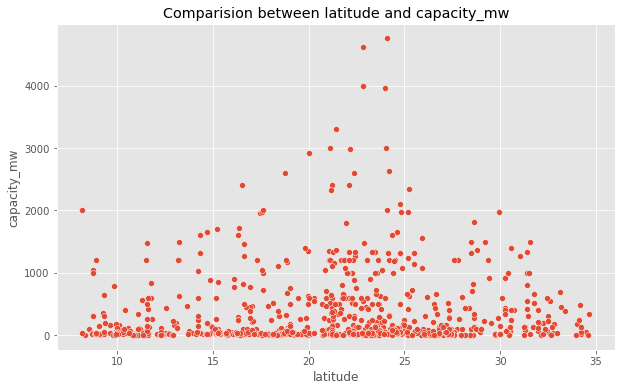

In [80]:
# Checking the relation between feature latitude and targer capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df["capacity_mw"])

Here this feature do not show any linear relationship

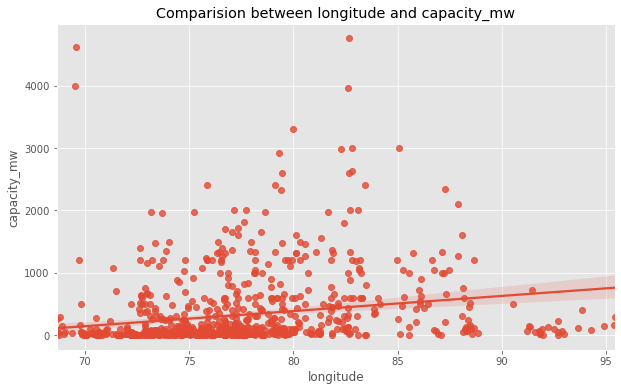

In [84]:
# Checking the relationship between target longitude and capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df["capacity_mw"]);

This feature also do not show any linear relationship

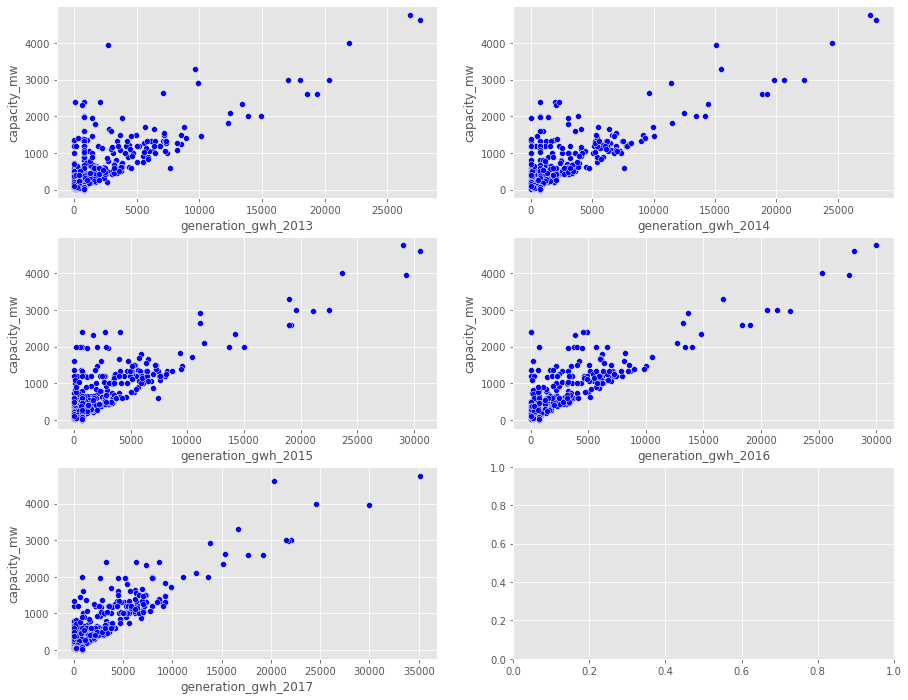

In [93]:
fig,axes=plt.subplots(3,2,figsize=(15,12))

#Checking the relation between feature generation_gwh_2013 and targer capacity_mw
sns.scatterplot(x = "generation_gwh_2013", y = "capacity_mw",ax=axes[0,0],data = df,color="b")

#Checking the relation between feature generation_gwh_2014 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2015 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[1,0],data=df,color="b")

#Checking the relation between feature generation_gwh_2016 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2017 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[2,0],data=df,color="b")
plt.show()

This features shows a positive corelation. Here the electricity generation reported for the years has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately.

## Corealtion between features and targer 'Fuel_Types'

<AxesSubplot:title={'center':'Comparision between Power_plant_age and Fuel_Type'}, xlabel='Power_plant_age', ylabel='Fuel_Type'>

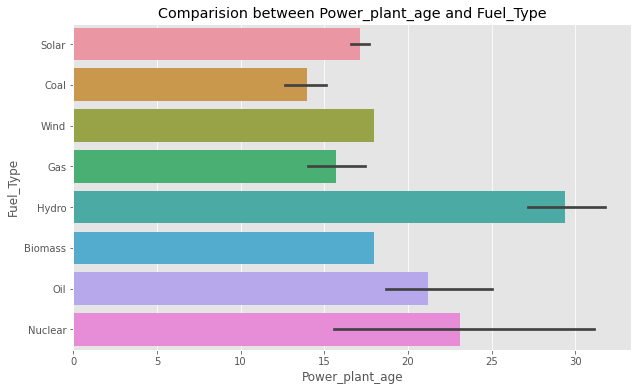

In [107]:
#Checking the relation between target fuel_type and variable Power_plant_age
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and Fuel_Type')
sns.barplot(df['Power_plant_age'],df["Fuel_Type"])

Here we can see that older power plants uses Hydro as energy source, followed by oil. The newer power plants are using more of Coal, Solar and Gas

<AxesSubplot:title={'center':'Comparision between latitude and Fuel_Type'}, xlabel='latitude', ylabel='Fuel_Type'>

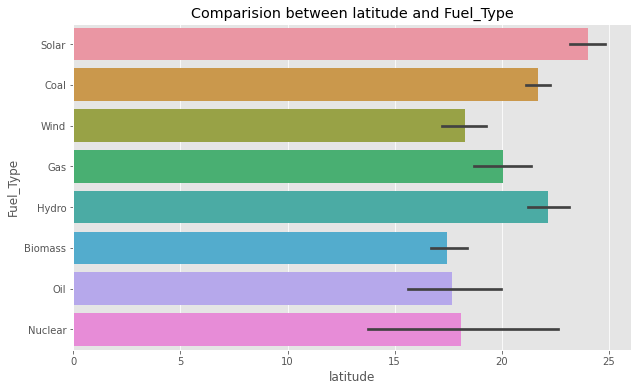

In [108]:
# Checking the relation between feature latitude and targer Fuel_Type
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and Fuel_Type')
sns.barplot(df['latitude'],df["Fuel_Type"])

Solar has the highest latitude

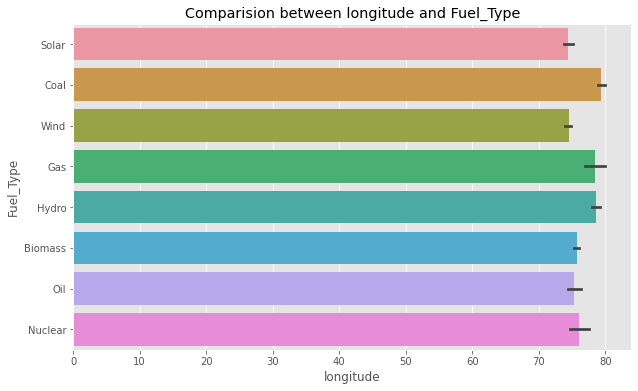

In [109]:
# Checking the relationship between target longitude and Fuel_Type
plt.figure(figsize=[10,6])
plt.title('Comparision between longitude and Fuel_Type')
sns.barplot(df['longitude'],df["Fuel_Type"]);

Here Gas shows the highest longitude

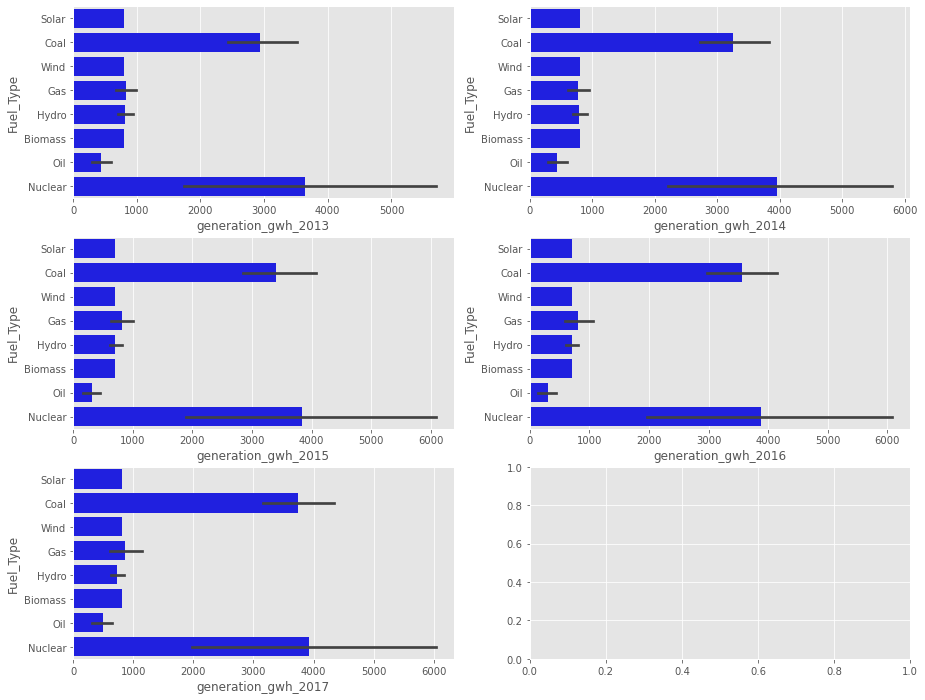

In [106]:
fig,axes=plt.subplots(3,2,figsize=(15,12))

#Checking the relation between feature generation_gwh_2013 and targer Fuel_Type
sns.barplot(x = "generation_gwh_2013", y = "Fuel_Type",ax=axes[0,0],data = df,color="b")

#Checking the relation between feature generation_gwh_2014 and targer Fuel_Type
sns.barplot(x='generation_gwh_2014',y='Fuel_Type',ax=axes[0,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2015 and targer Fuel_Type
sns.barplot(x='generation_gwh_2015',y='Fuel_Type',ax=axes[1,0],data=df,color="b")

#Checking the relation between feature generation_gwh_2016 and targer Fuel_Type
sns.barplot(x='generation_gwh_2016',y='Fuel_Type',ax=axes[1,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2017 and targer Fuel_Type
sns.barplot(x='generation_gwh_2017',y='Fuel_Type',ax=axes[2,0],data=df,color="b")
plt.show()

Here we can see that the most used energy source in all the years is neuclear followed by coal

### Checking the relationship between both the targets

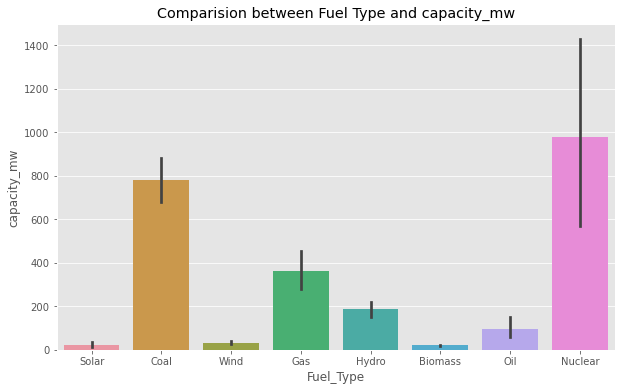

In [110]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Fuel Type and capacity_mw")
sns.barplot(x = "Fuel_Type", y = "capacity_mw", data = df)
plt.show()

Here also it shows that energy source Nuclear has shown the major contribution

## Label Encoding

In [113]:
categorical_col = ['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']

In [117]:
LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [118]:
df[categorical_col]

,Fuel_Type,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
903,1,2,22,2
904,6,2,77,0
905,7,2,21,2
906,1,2,59,2


Now we have encoded the categorical columns

## Identifying the outliers

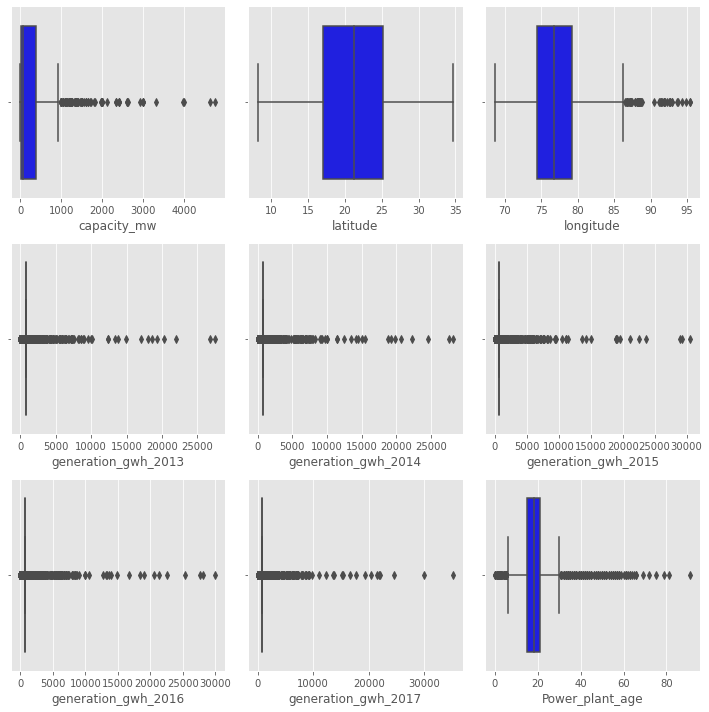

In [121]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="blue")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In the boxplot we can notice the outliers present in all the columns except latitude. Even target column has outliers but no need to remove it. Let's remove outliers using Zscore method.

In [122]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'source', 'geolocation_source', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'Power_plant_age'],
      dtype='object')

In [123]:
# Features containing outliers
features = df[['longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','Power_plant_age']]

In [125]:
z=np.abs(zscore(features))

z

array([[0.87220856, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.97991772],
       [0.58602743, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       [1.68109953, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       ...,
       [0.38271188, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       [0.76616907, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       [0.01377542, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747]])

In [126]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,797.063475,805.760000,701.027250,716.728350,807.601700,7.0
1,98.0,24.7663,74.6090,1,2,174,2,797.063475,805.760000,701.027250,716.728350,807.601700,18.0
2,39.2,21.9038,69.3732,7,2,21,2,797.063475,805.760000,701.027250,716.728350,807.601700,18.0
3,135.0,23.8712,91.3602,2,2,22,2,631.777928,617.789264,843.747000,886.004428,663.774500,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2,22,2,797.063475,805.760000,0.994875,233.596650,865.400000,2.0
904,3.0,12.8932,78.1654,6,2,77,0,797.063475,805.760000,701.027250,716.728350,807.601700,18.0
905,25.5,15.2758,75.5811,7,2,21,2,797.063475,805.760000,701.027250,716.728350,807.601700,18.0
906,80.0,24.3500,73.7477,1,2,59,2,797.063475,805.760000,701.027250,716.728350,807.601700,18.0


In [127]:
df.shape

(908, 13)

In [128]:
new_df.shape

(852, 13)

We can see that we have successfully removed the outliers

## Correlation between the target variable and features using HEAT map

In [129]:
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
capacity_mw,1.000000,0.047883,0.269970,-0.398618,-0.002132,-0.277952,0.236602,0.575972,0.627406,0.685477,0.761222,0.800618,-0.248690
latitude,0.047883,1.000000,-0.025155,-0.006130,0.036941,0.068515,-0.201910,0.074709,0.082205,0.071786,0.057760,0.070934,-0.084720
longitude,0.269970,-0.025155,1.000000,-0.388568,0.029138,-0.234616,0.264391,0.122737,0.126913,0.163771,0.207339,0.209047,-0.107977
Fuel_Type,-0.398618,-0.006130,-0.388568,1.000000,0.006390,0.039078,-0.478338,-0.232343,-0.250540,-0.277754,-0.290226,-0.291655,0.087476
other_fuel1,-0.002132,0.036941,0.029138,0.006390,1.000000,0.028433,-0.022798,0.001675,-0.000346,0.005892,0.015135,0.011855,-0.055179
source,-0.277952,0.068515,-0.234616,0.039078,0.028433,1.000000,-0.498012,-0.135116,-0.141641,-0.157690,-0.161786,-0.158162,-0.056455
geolocation_source,0.236602,-0.201910,0.264391,-0.478338,-0.022798,-0.498012,1.000000,0.108337,0.113568,0.126437,0.129721,0.126815,0.035803
generation_gwh_2013,0.575972,0.074709,0.122737,-0.232343,0.001675,-0.135116,0.108337,1.000000,0.944730,0.845955,0.730317,0.660801,-0.012797
generation_gwh_2014,0.627406,0.082205,0.126913,-0.250540,-0.000346,-0.141641,0.113568,0.944730,1.000000,0.911892,0.800808,0.742744,-0.069265
generation_gwh_2015,0.685477,0.071786,0.163771,-0.277754,0.005892,-0.157690,0.126437,0.845955,0.911892,1.000000,0.907462,0.826148,-0.141499


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'capacity_mw'),
  Text(0, 1.5, 'latitude'),
  Text(0, 2.5, 'longitude'),
  Text(0, 3.5, 'Fuel_Type'),
  Text(0, 4.5, 'other_fuel1'),
  Text(0, 5.5, 'source'),
  Text(0, 6.5, 'geolocation_source'),
  Text(0, 7.5, 'generation_gwh_2013'),
  Text(0, 8.5, 'generation_gwh_2014'),
  Text(0, 9.5, 'generation_gwh_2015'),
  Text(0, 10.5, 'generation_gwh_2016'),
  Text(0, 11.5, 'generation_gwh_2017'),
  Text(0, 12.5, 'Power_plant_age')])

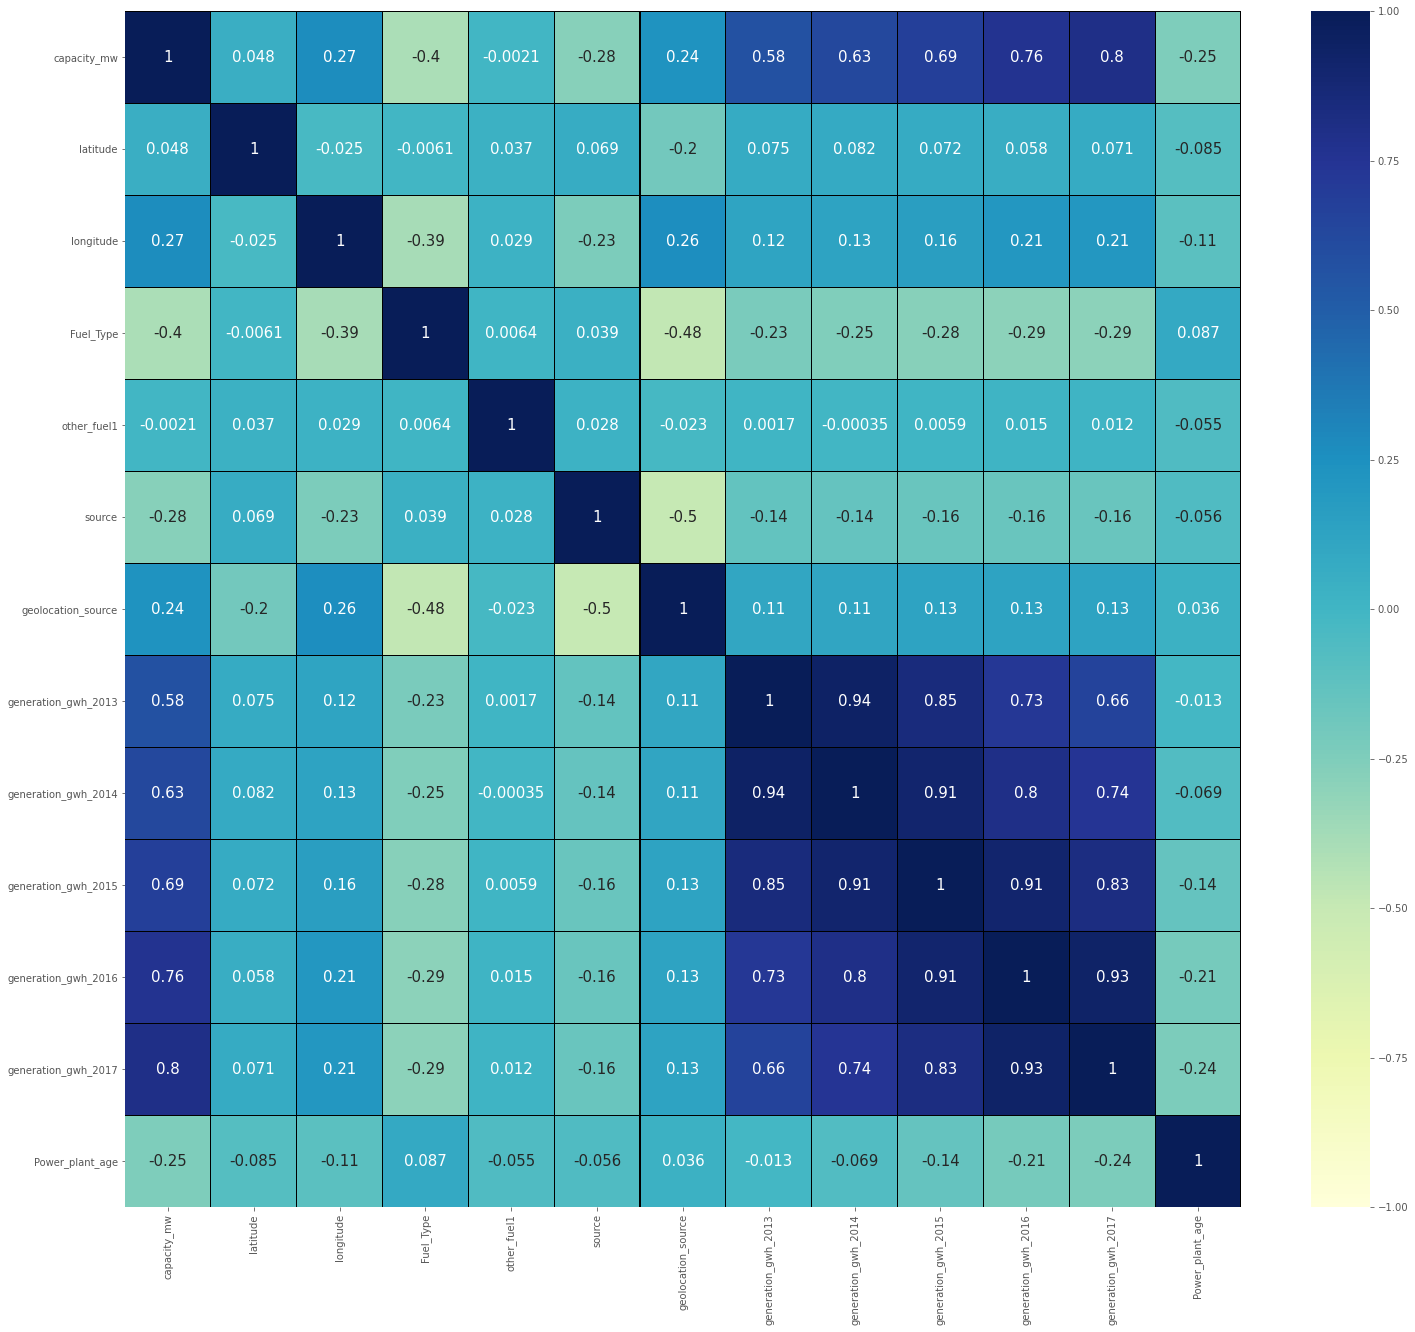

In [130]:
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0)

Here we can see the co-relation between all the features and the features and targets

The label capacity_mw is highly positively correlated with the features generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014, generation_gwh_2013.
And the label is negatively correlated with the features Fuel_Type, source and Power_plant_age.
The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

The label Fuel_Type is less correlated with Power_plant_age and source.
The label is negatively correlated with geolocation_source, longitude, capacity_mw, and all generation_gwh years.

From the heat map we can notice most of the features are highly correlated with each other which leads to multicollinearity problem. So will try to solve this problem by Checking VIF value before building our models.

Also the features other_fuel1 and latitude have very very less correlation with both the labels. Let's drop those columns.

## Visualizing the correlation between label and features using bar plot

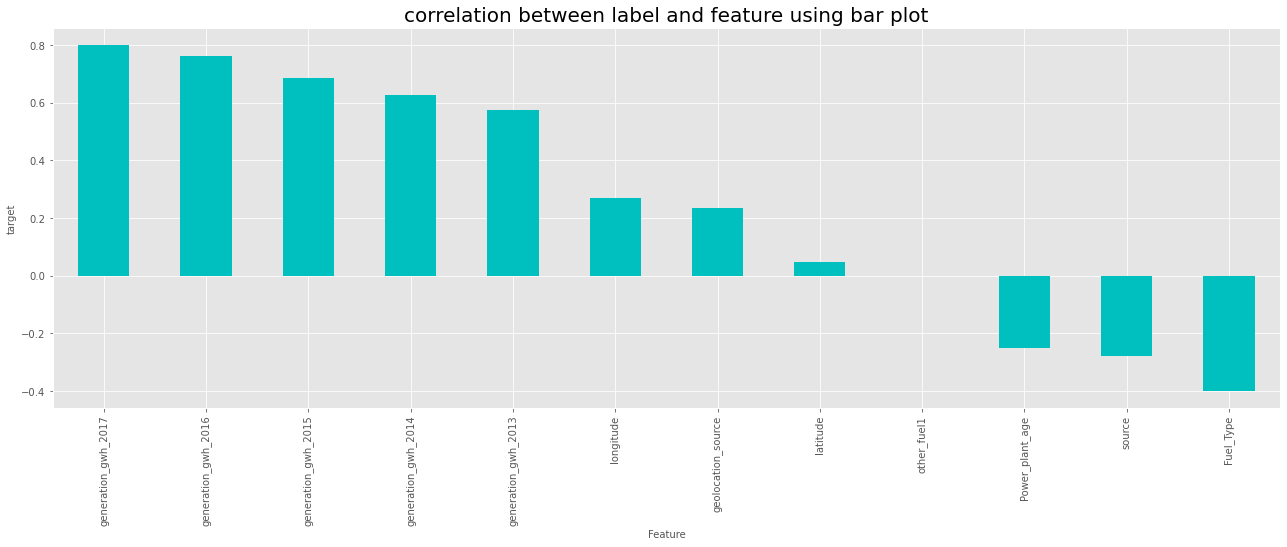

In [131]:
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

## Visualizing the correlation between label and features using bar plot

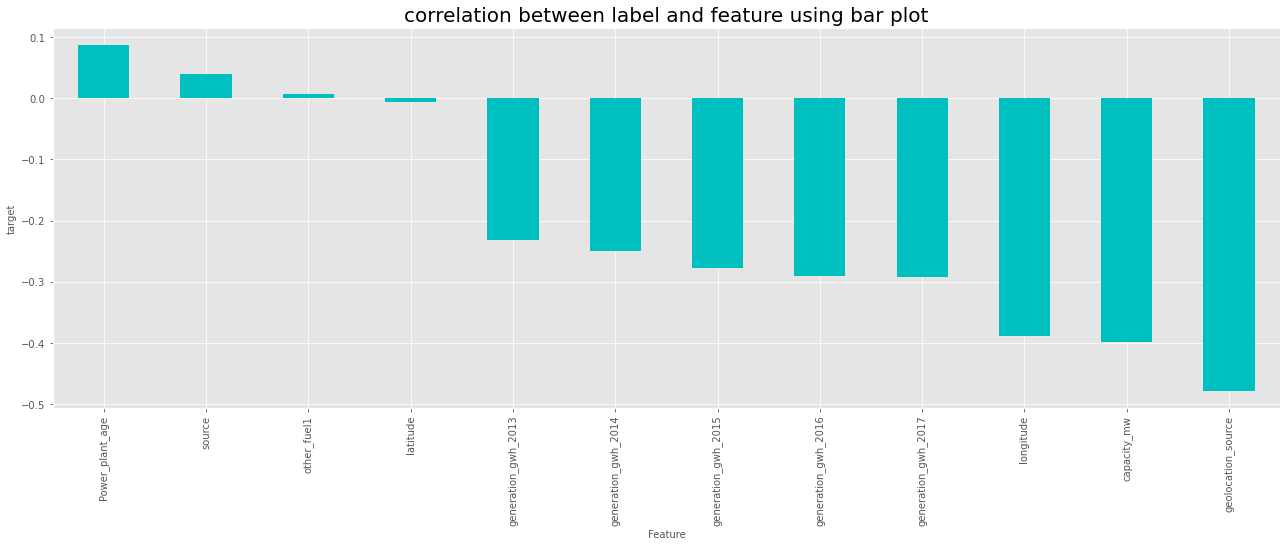

In [133]:
plt.figure(figsize=(22,7))
new_df.corr()['Fuel_Type'].sort_values(ascending=False).drop(['Fuel_Type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

### Feature selection by dropping irrelevant features

In [134]:
new_df.drop("other_fuel1",axis=1,inplace=True)
new_df.drop("latitude",axis=1,inplace=True)

In [135]:
new_df.head()

,capacity_mw,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,2.5,73.2407,6,109,1,797.063475,805.760000,701.02725,716.728350,807.601700,7.0
1,98.0,74.6090,1,174,2,797.063475,805.760000,701.02725,716.728350,807.601700,18.0
2,39.2,69.3732,7,21,2,797.063475,805.760000,701.02725,716.728350,807.601700,18.0
3,135.0,91.3602,2,22,2,631.777928,617.789264,843.74700,886.004428,663.774500,14.0
4,1800.0,82.4091,1,22,2,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,3.0


# ..............................................PREDICTION..........................................................

## 1. Capacity_mw

### Seperating the features and target variable

In [136]:
x=new_df.drop('capacity_mw', axis=1)
y=new_df["capacity_mw"]

In [137]:
x.shape

(852, 10)

In [138]:
y.shape

(852,)

## Checking for skewness

In [140]:
x.skew().sort_values()

geolocation_source    -2.068499
Fuel_Type              0.413982
longitude              0.888694
Power_plant_age        1.209638
source                 1.736117
generation_gwh_2017    2.532066
generation_gwh_2016    2.635667
generation_gwh_2015    2.714988
generation_gwh_2014    2.940976
generation_gwh_2013    3.096648
dtype: float64

The following columns have skewness more than +0.5 and -0.5.

longitude
generation_gwh_2013
generation_gwh_2014
generation_gwh_2015
generation_gwh_2016
generation_gwh_2017
Power_plant_age

## Removing skewness using yeo-johnson method

In [142]:
skew = ['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [143]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.924039,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.138596
1,-0.500630,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
2,-2.373612,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
3,2.492970,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.306973
4,1.285220,0.743909,1.423753,2.285309,2.271019,1.972415,-1.802274


In [144]:
x.skew()

longitude              0.000077
Fuel_Type              0.413982
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2013    0.278188
generation_gwh_2014    0.233082
generation_gwh_2015    0.162566
generation_gwh_2016    0.146869
generation_gwh_2017    0.125693
Power_plant_age        0.037747
dtype: float64

The skewness has been removed now

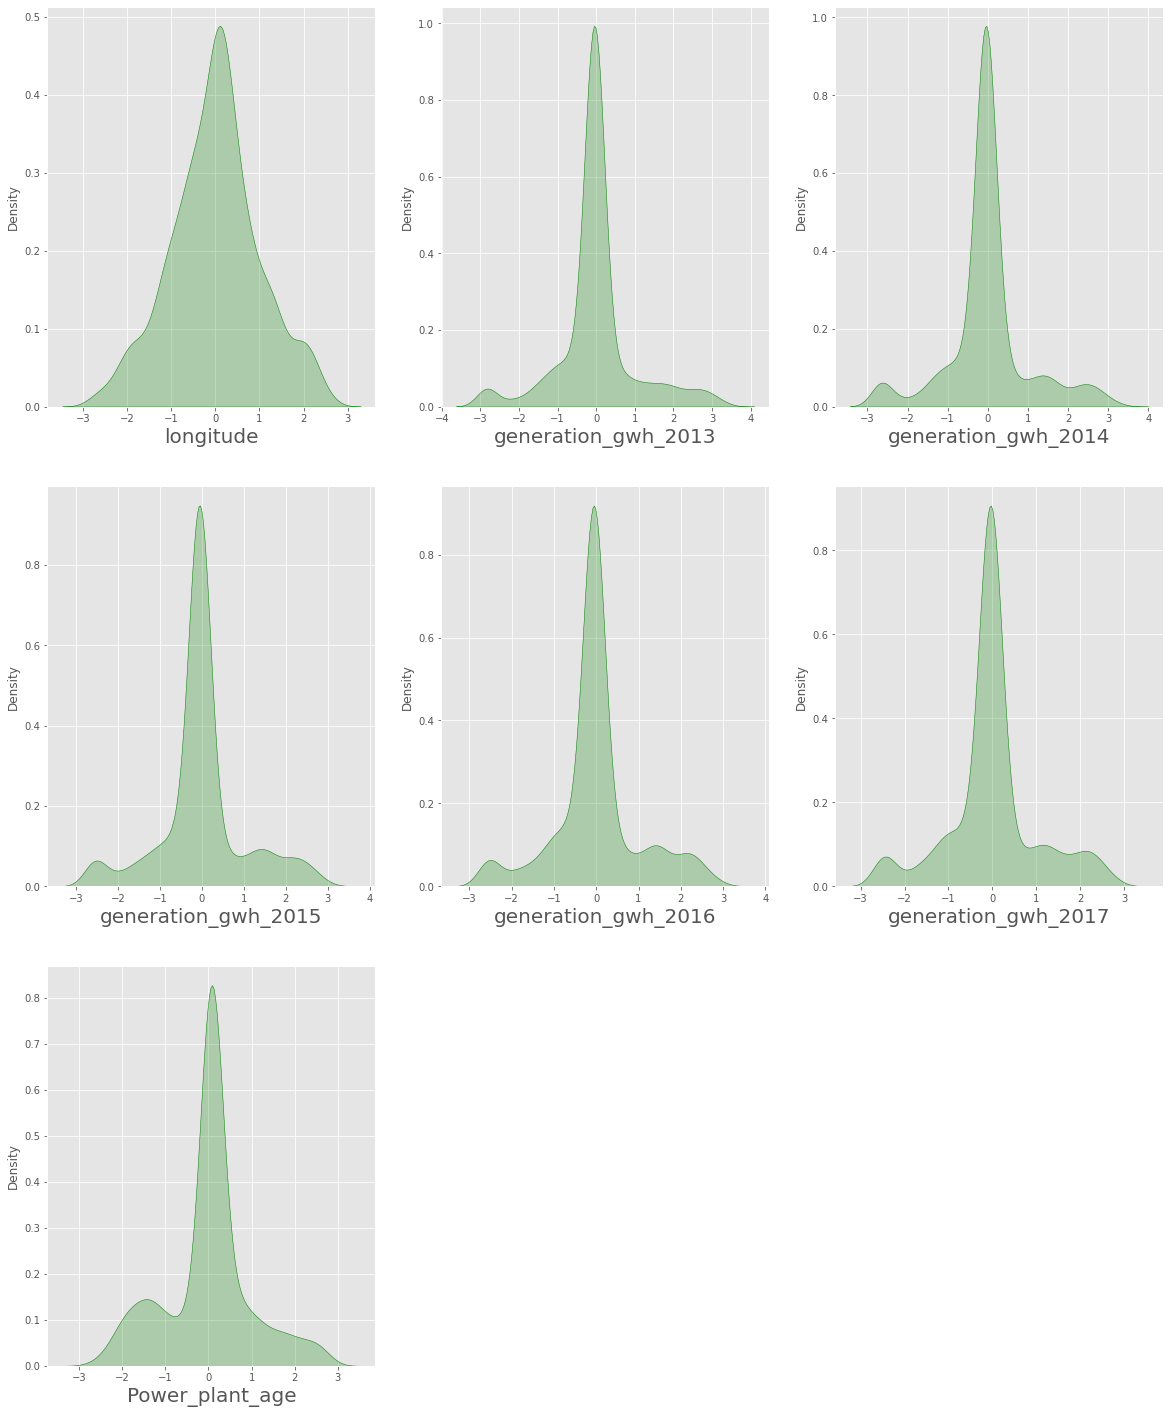

In [145]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The dataset looks normal now

## Feature Scalling

In [147]:
#Scalling the data using Standard Scaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.924039,1.175664,1.399156,-1.037509,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.138596
1,-0.500630,-0.973833,2.823623,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
2,-2.373612,1.605563,-0.529352,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
3,2.492970,-0.543934,-0.507437,0.406866,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.306973
4,1.285220,-0.973833,-0.507437,0.406866,0.743909,1.423753,2.285309,2.271019,1.972415,-1.802274
...,...,...,...,...,...,...,...,...,...,...
847,0.237064,-0.973833,-0.507437,0.406866,-0.044354,-0.045943,-2.448545,-0.825789,0.016799,-2.017970
848,0.429134,1.175664,0.697881,-2.481884,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
849,-0.223563,1.605563,-0.529352,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
850,-0.762359,-0.973833,0.303413,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356


The dataset x has now been scalled

## Checking Multi-colinearity

In [149]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.313067,longitude
1,1.687238,Fuel_Type
2,1.502947,source
3,1.875104,geolocation_source
4,5.457906,generation_gwh_2013
5,7.210903,generation_gwh_2014
6,6.174992,generation_gwh_2015
7,9.656587,generation_gwh_2016
8,5.196305,generation_gwh_2017
9,1.127725,Power_plant_age


VIF values in all the columns are less then 10, hence no multicolinearity problem exists.

# MODELLING FOR CAPACITY_MW

In [155]:
#gettig the best random state
maxAccu=0
maxRS=0
for i in range(1,100): 
    x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=.30,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu, 'Random_State',maxRS)

R2 Score= 0.8508190556608765 Random_State 85


We got r2 score of 85% at a random state of 85

## Train_test_Split

In [156]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.30, random_state=maxRS)

## Linear Regression

In [159]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

R2_score: 0.5808195410169203
MAE: 203.43774265982063
MSE: 77518.8794399163
RMSE: 278.422124551761


Getting an accuracy score of 58% with the base line Linear Regression Model

## Random Forest Regressor

In [160]:
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

# prediction
predrf=rf.predict(x_test)
print('R2_score:',r2_score(y_test,predrf))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predrf))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predrf))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_score: 0.8430060011654179
MAE: 89.23156010999277
MSE: 29032.839216724024
RMSE: 170.39025563900074


Getting an accuracy score of 84% with this model

## KNN Regressor

In [161]:
knn=KNN()
knn.fit(x_train,y_train)

predknn=knn.predict(x_test)
print('R2_score:',r2_score(y_test,predknn))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predknn))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predknn))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknn)))

R2_score: 0.8312159885088886
MAE: 88.30675000000001
MSE: 31213.161677207503
RMSE: 176.67247006029973


Getting an accuracy score of 83% with this model

## Gradient Boosting Regressor

In [162]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

predgb=gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predgb))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predgb))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predgb))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))

R2_Score: 0.8404371988768142
MAE: 92.26293611499571
MSE: 29507.88682604803
RMSE: 171.77859827710793


Getting an accuracy score of 84% with this model

## Bagging Regressor

In [166]:
br=BaggingRegressor()
br.fit(x_train,y_train)

predbr=br.predict(x_test)
print('R2_Score:',r2_score(y_test,predbr))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predbr))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predbr))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predbr)))

R2_Score: 0.8283667383050679
MAE: 92.58532042220475
MSE: 31740.07241054646
RMSE: 178.1574371463242


Getting the r2score for this model as 83%

# Cross- Validation

In [168]:
# Checking cv score for Linear Regression
print(cross_val_score(LR,x,y,cv=5).mean())

# Checking cv score for Random Forest Regressor
print(cross_val_score(rf,x,y,cv=5).mean())

#Checking the cv score for KNN Regressor
print(cross_val_score(knn,x,y,cv=5).mean())

#Checking the cv score for GradientBoostingRegressor
print(cross_val_score(gb,x,y,cv=5).mean())

#Checking the cv score for BaggingRegressor
print(cross_val_score(br,x,y,cv=5).mean())

0.5343957411197856
0.7730687958188269
0.7417542415978613
0.7622364932887644
0.7454429780411163


From the above observation, the difference between R2 score and the cross validation score we conclude that Random Forest Regressor as our best fitting model. Let's increse the accuracy of the model by usiing hyper parameter tuning.

# Hyper Parameter Tuning for the model with best acc and cv score

In [170]:
#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [171]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [172]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [173]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200}

These are the best parameters for the RandomForestRegressor

In [177]:
capacity_mw = RandomForestRegressor(criterion='mse', max_depth=6, max_features='log2', n_estimators=200)
capacity_mw.fit(x_train, y_train)
pred = capacity_mw.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_Score: 84.88504541385677
RMSE value: 170.39025563900074


After HyperParameter Tuning, we are getting an accuracy score of 84%

## Saving the model

In [179]:
import joblib
joblib.dump(capacity_mw,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

# 2. Fuel_Type (Prediction)

## Seperating the Dataset into Features and Label(Fuel_Type)

In [181]:
x_df = new_df.drop("Fuel_Type", axis=1)
y_df = new_df["Fuel_Type"]

In [182]:
x_df.shape

(852, 10)

In [183]:
y_df.shape

(852,)

## Checking the Skewness of x_df

In [185]:
x_df.skew().sort_values()

geolocation_source    -2.068499
longitude              0.888694
Power_plant_age        1.209638
source                 1.736117
capacity_mw            2.134177
generation_gwh_2017    2.532066
generation_gwh_2016    2.635667
generation_gwh_2015    2.714988
generation_gwh_2014    2.940976
generation_gwh_2013    3.096648
dtype: float64

We can see that there are skewness in most of the columns

## Removing the skewness

In [186]:
skew = ['capacity_mw','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [187]:
x_df[skew] = scaler.fit_transform(x_df[skew].values)
x_df[skew].head()

,capacity_mw,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-1.675434,-0.924039,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.138596
1,0.214717,-0.500630,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
2,-0.280583,-2.373612,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
3,0.386767,2.492970,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.306973
4,1.740344,1.285220,0.743909,1.423753,2.285309,2.271019,1.972415,-1.802274


In [188]:
x_df.skew().sort_values()

geolocation_source    -2.068499
longitude              0.000077
capacity_mw            0.013903
Power_plant_age        0.037747
generation_gwh_2017    0.125693
generation_gwh_2016    0.146869
generation_gwh_2015    0.162566
generation_gwh_2014    0.233082
generation_gwh_2013    0.278188
source                 1.736117
dtype: float64

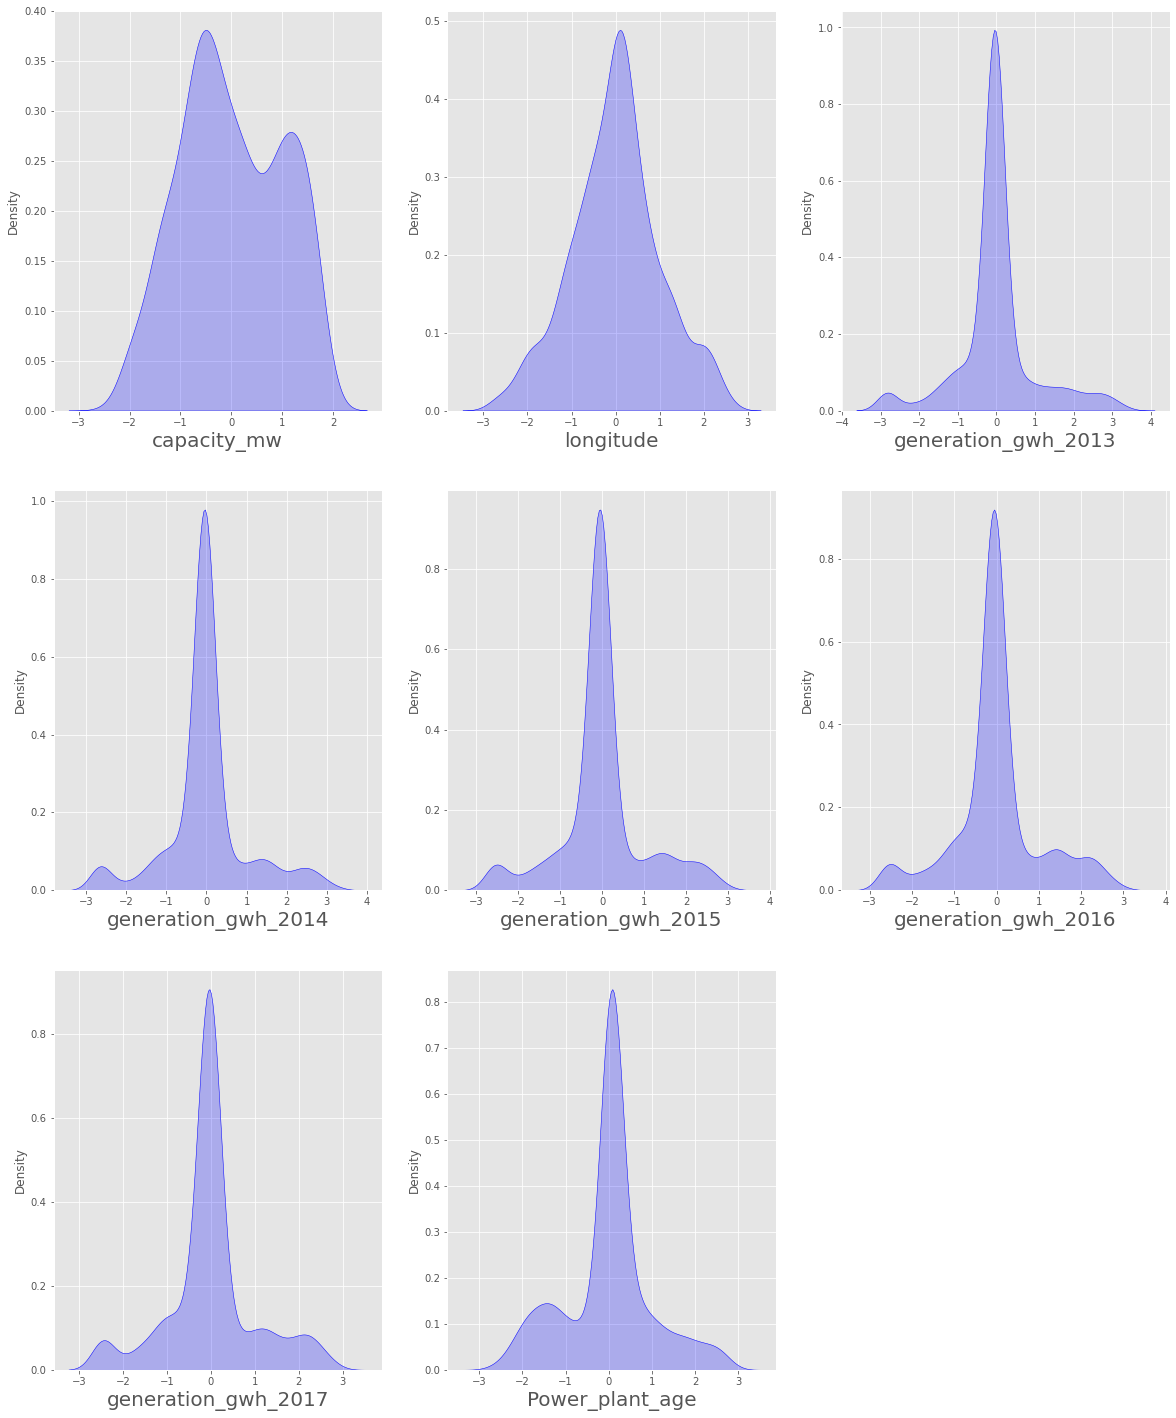

In [193]:
#Lets visualize the data

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='b',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The dataset looks normally distributed now

## Feature Scalling

In [195]:
scaler=StandardScaler()
x_df=pd.DataFrame(scaler.fit_transform(x_df),columns=x_df.columns)
x_df

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-1.675434,-0.924039,1.399156,-1.037509,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.138596
1,0.214717,-0.500630,2.823623,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
2,-0.280583,-2.373612,-0.529352,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
3,0.386767,2.492970,-0.507437,0.406866,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.306973
4,1.740344,1.285220,-0.507437,0.406866,0.743909,1.423753,2.285309,2.271019,1.972415,-1.802274
...,...,...,...,...,...,...,...,...,...,...
847,1.680420,0.237064,-0.507437,0.406866,-0.044354,-0.045943,-2.448545,-0.825789,0.016799,-2.017970
848,-1.597071,0.429134,0.697881,-2.481884,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
849,-0.513131,-0.223563,-0.529352,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
850,0.105331,-0.762359,0.303413,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356


Here we have scalled the dataset

## Checking Multicolinearity

In [196]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values,i)
              for i in range(len(x_df.columns))]
vif["Features"] = x_df.columns

# Let's check the values
vif

,VIF values,Features
0,1.827367,capacity_mw
1,1.199592,longitude
2,1.412236,source
3,1.588651,geolocation_source
4,5.468598,generation_gwh_2013
5,7.212366,generation_gwh_2014
6,6.182418,generation_gwh_2015
7,9.655331,generation_gwh_2016
8,5.231173,generation_gwh_2017
9,1.182482,Power_plant_age


We have seen that all the columns has vif values less then 10, hence there is no multicolinearity that exist.

In [197]:
y_df.value_counts()

1    240
3    218
6    126
7    123
2     65
0     50
5     21
4      9
Name: Fuel_Type, dtype: int64

We can see that the targer Fuel_Type has multiple classes in the mode of energy source, hence we can see that this is a multi classification problem. As the data between the classes are not balance with 1 having 240 counys and 4 having only 9 counts, we have to do oversampling of the data.

## OverSampling

In [200]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_df, y_df = sm.fit_resample(x_df,y_df)

In [201]:
y_df.value_counts()

0    240
1    240
2    240
3    240
4    240
5    240
6    240
7    240
Name: Fuel_Type, dtype: int64

Here we can see that the data imbalance has been removed.

In [202]:
x_df.head()

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-1.675434,-0.924039,1.399156,-1.037509,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.138596
1,0.214717,-0.500630,2.823623,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
2,-0.280583,-2.373612,-0.529352,0.406866,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.078356
3,0.386767,2.492970,-0.507437,0.406866,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.306973
4,1.740344,1.285220,-0.507437,0.406866,0.743909,1.423753,2.285309,2.271019,1.972415,-1.802274


# Modelling

## Getting the best random state

In [208]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_df_train,x_df_test, y_df_train, y_df_test=train_test_split(x_df,y_df,test_size=.30, random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_df_train,y_df_train)
    pred=rfc.predict(x_df_test)
    acc=accuracy_score(y_df_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS) 

Best accuracy is  0.9305555555555556  on Random_state  149


We got an accuracy score of 93% with a RandomState of 149

# Creating train_test_split

In [209]:
x_df_train,x_df_test,y_df_train,y_df_test=train_test_split(x_df,y_df,test_size=.30,random_state=maxRS)

We have created the train_test_split based on the masRS

## 1.Logistic Regression

In [210]:
# Checking Accuracy for Logistic Regression
log = LogisticRegression()
log.fit(x_df_train,y_df_train)

#Prediction
predlog = log.predict(x_df_test)

print(accuracy_score(y_df_test, predlog))
print(confusion_matrix(y_df_test, predlog))
print(classification_report(y_df_test,predlog))

0.7152777777777778
[[62  0  0  1  0  1  0  6]
 [ 7 29  8  4 11  2  0  1]
 [ 1  7 29 11  5 15  0  1]
 [ 0 10 10 29  5  5  0 17]
 [ 0  0  0  0 72  5  0  0]
 [ 8  4  0  1  0 56  0  2]
 [ 0  1  0  0  0  0 69  0]
 [ 0  0  0 15  0  0  0 66]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        70
           1       0.57      0.47      0.51        62
           2       0.62      0.42      0.50        69
           3       0.48      0.38      0.42        76
           4       0.77      0.94      0.85        77
           5       0.67      0.79      0.72        71
           6       1.00      0.99      0.99        70
           7       0.71      0.81      0.76        81

    accuracy                           0.72       576
   macro avg       0.70      0.71      0.70       576
weighted avg       0.70      0.72      0.70       576



The accuracy score for Logistic Regression is 71%

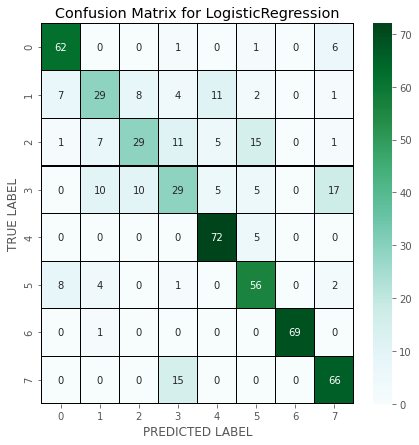

In [212]:
# Plotting Confusion_Matrix
cm = confusion_matrix(y_df_test,predlog)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for LogisticRegression')
plt.show()

## 2.Random Forest Classifier

In [214]:
# Checking accuracy for Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_df_train,y_df_train)

# Prediction
predrf = rf.predict(x_df_test)

print(accuracy_score(y_df_test, predrf))
print(confusion_matrix(y_df_test, predrf))
print(classification_report(y_df_test,predrf))

0.9253472222222222
[[67  1  0  2  0  0  0  0]
 [ 1 45  5  4  4  2  0  1]
 [ 0  2 61  1  0  5  0  0]
 [ 0  6  4 64  0  2  0  0]
 [ 0  1  0  0 76  0  0  0]
 [ 0  0  2  0  0 69  0  0]
 [ 0  0  0  0  0  0 70  0]
 [ 0  0  0  0  0  0  0 81]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        70
           1       0.82      0.73      0.77        62
           2       0.85      0.88      0.87        69
           3       0.90      0.84      0.87        76
           4       0.95      0.99      0.97        77
           5       0.88      0.97      0.93        71
           6       1.00      1.00      1.00        70
           7       0.99      1.00      0.99        81

    accuracy                           0.93       576
   macro avg       0.92      0.92      0.92       576
weighted avg       0.92      0.93      0.92       576



The accuracy score for RandomForestClassifier is 92%

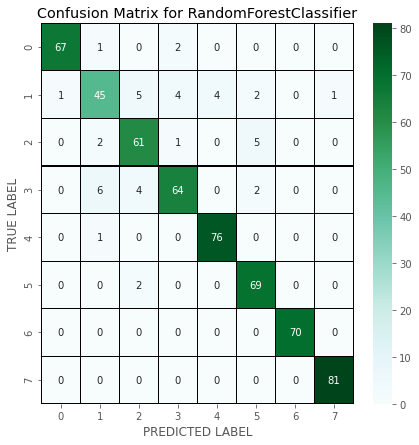

In [215]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_df_test,predrf)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

## 3.Decission Tree Classifier

In [216]:
# Checking Accuracy for Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_df_train,y_df_train)

#Prediction
preddtc = dtc.predict(x_df_test)

print(accuracy_score(y_df_test, preddtc))
print(confusion_matrix(y_df_test, preddtc))
print(classification_report(y_df_test,preddtc))

0.8819444444444444
[[62  6  0  2  0  0  0  0]
 [ 1 48  5  3  3  2  0  0]
 [ 0  2 60  3  0  4  0  0]
 [ 0 10 10 53  0  3  0  0]
 [ 0  4  4  0 69  0  0  0]
 [ 0  2  3  1  0 65  0  0]
 [ 0  0  0  0  0  0 70  0]
 [ 0  0  0  0  0  0  0 81]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        70
           1       0.67      0.77      0.72        62
           2       0.73      0.87      0.79        69
           3       0.85      0.70      0.77        76
           4       0.96      0.90      0.93        77
           5       0.88      0.92      0.90        71
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        81

    accuracy                           0.88       576
   macro avg       0.88      0.88      0.88       576
weighted avg       0.89      0.88      0.88       576



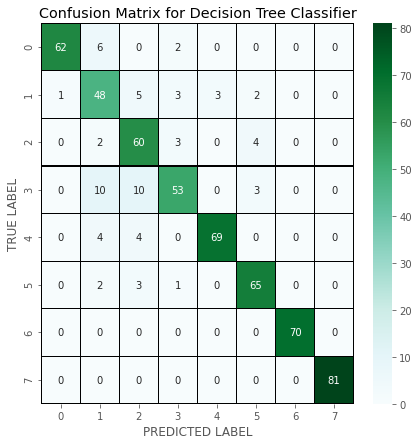

In [217]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_df_test,preddtc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

## 4.Support Vector Machine Classifier

In [218]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_df_train,y_df_train)

# Prediction
predsvc = svc.predict(x_df_test)

print(accuracy_score(y_df_test, predsvc))
print(confusion_matrix(y_df_test, predsvc))
print(classification_report(y_df_test,predsvc))

0.8246527777777778
[[59  0  0  0  0  1  0 10]
 [ 7 37  7  1  2  3  0  5]
 [ 0  2 48  3  1 14  0  1]
 [ 0  9 10 43  1  1  0 12]
 [ 0  2  1  0 74  0  0  0]
 [ 1  4  0  0  0 64  0  2]
 [ 0  0  0  0  0  0 70  0]
 [ 0  0  1  0  0  0  0 80]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        70
           1       0.69      0.60      0.64        62
           2       0.72      0.70      0.71        69
           3       0.91      0.57      0.70        76
           4       0.95      0.96      0.95        77
           5       0.77      0.90      0.83        71
           6       1.00      1.00      1.00        70
           7       0.73      0.99      0.84        81

    accuracy                           0.82       576
   macro avg       0.83      0.82      0.82       576
weighted avg       0.83      0.82      0.82       576



The accuracy scoe for svc is 82%

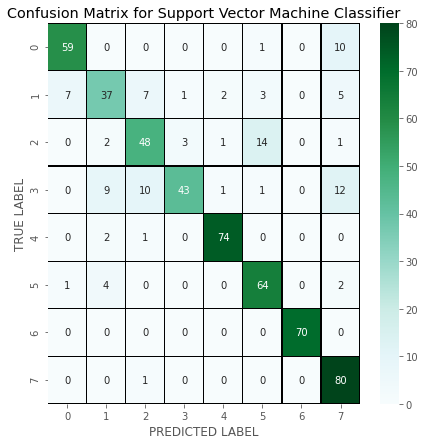

In [219]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_df_test,predsvc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

## 5.Gradient Boosting Classifier

In [220]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_df_train,y_df_train)

# Prediction
predGB = GB.predict(x_df_test)

print(accuracy_score(y_df_test, predGB))
print(confusion_matrix(y_df_test, predGB))
print(classification_report(y_df_test,predGB))

0.9253472222222222
[[66  3  0  1  0  0  0  0]
 [ 0 48  5  5  3  1  0  0]
 [ 0  1 64  1  0  3  0  0]
 [ 0  9  5 60  0  2  0  0]
 [ 0  2  0  0 75  0  0  0]
 [ 0  0  2  0  0 69  0  0]
 [ 0  0  0  0  0  0 70  0]
 [ 0  0  0  0  0  0  0 81]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        70
           1       0.76      0.77      0.77        62
           2       0.84      0.93      0.88        69
           3       0.90      0.79      0.84        76
           4       0.96      0.97      0.97        77
           5       0.92      0.97      0.95        71
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        81

    accuracy                           0.93       576
   macro avg       0.92      0.92      0.92       576
weighted avg       0.93      0.93      0.93       576



Getting an accuracy score of 92% with Gradient Boosting Classifier

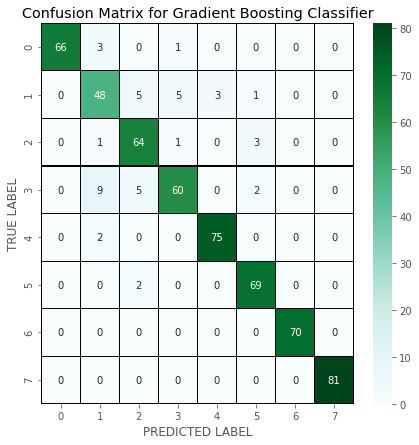

In [221]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_df_test,predGB)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

## Cross_Validation_Score

In [222]:
#cv score for Logistic Regression
print(cross_val_score(log,x_df,y_df,cv=5).mean())

# cv score for Decision Tree Classifier
print(cross_val_score(dtc,x_df,y_df,cv=5).mean())

# cv score for Random Forest Classifier
print(cross_val_score(rf,x_df,y_df,cv=5).mean())

# cv score for Support Vector  Classifier
print(cross_val_score(svc,x_df,y_df,cv=5).mean())

# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x_df,y_df,cv=5).mean())

0.7010416666666668
0.8619791666666666
0.9145833333333334
0.7947916666666667
0.89375


From the accuracy score and cross validation we can see that Random Forest Classifier is the best model.

## HyperParameter Tuning for the model with best score

In [223]:
#Random Forest Classifier

parameters = {'criterion':['gini'],
             'max_features':['auto'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [224]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [225]:
GCV.fit(x_df_train,y_df_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [0, 200]})

In [226]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

These are the best parameters

In [227]:
fuel_type =RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
fuel_type.fit(x_df_train, y_df_train)
pred = fuel_type.predict(x_df_test)
acc=accuracy_score(y_df_test,pred)
print(acc*100)

90.625


After HyperParameter tuning we have received an accuracy score of 91%

## Plotting ROC and compare AUC for the final model

In [229]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

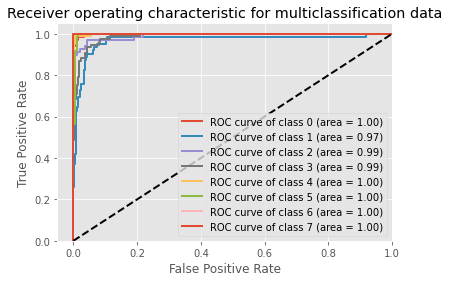

In [230]:
classifier = OneVsRestClassifier(fuel_type)
y_score = classifier.fit(x_df_train, y_df_train).predict_proba(x_df_test)

#Binarize the output
y_df_test_bin  = label_binarize(y_df_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_df_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
   
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()

In [4]:
#Save the model

In [231]:
import joblib
joblib.dump(fuel_type,"Global_Power_Plant_Fuel_Type.pkl")

['Global_Power_Plant_Fuel_Type.pkl']

Model has been saved.

##### Conclusion:
Accuracy score for Fuel_Type: 91%

Accuracy score for capacity_mw: 84%